In [1]:
import os
from snudda.simulate.network_pair_pulse_simulation import SnuddaNetworkPairPulseSimulation
n_dSPN = 5
n_iSPN = 5
n_FS = 2
n_LTS = 2
n_ChIN = 2

hold_v = -80e-3    # Holding voltage
max_dist = 100e-6  # Only look at pairs closer than this distance
GABA_rev = -60e-3  # GABA reversal potential

cur_inj = 10e-9

network_path = os.path.join("networks","pair_pulse_simulation")
volume_type="cube"
side_len = 200e-6

In [2]:
pps = SnuddaNetworkPairPulseSimulation(network_path=network_path,
                                       exp_type="Planert2010",
                                       pre_type="FS",
                                       post_type="ALL",
                                       max_dist=max_dist,
                                       hold_voltage=hold_v,
                                       current_injection = cur_inj,
                                       random_seed=123)

Using log file networks/pair_pulse_simulation/log/pair-pulse.log
Checking depolarisation/hyperpolarisation of FS to ALL synapses


In [ ]:
pps.setup(n_dSPN=n_dSPN, n_iSPN=n_iSPN,
          n_FS=n_FS, n_LTS=n_LTS, n_ChIN=n_ChIN,
          volume_type=volume_type,
          side_len=side_len)

In [ ]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

In [ ]:
from snudda.detect import SnuddaDetect
sd = SnuddaDetect(network_path=network_path)
sd.detect()

In [ ]:
from snudda.detect import SnuddaPrune
spr = SnuddaPrune(network_path=network_path)
spr.prune()
spr = None

Compile neuron modules

In [ ]:
!nrnivmodl ../../snudda/data/neurons/mechanisms

To run in parallel instead of the cell below, run this in the ```examples/notebooks``` folder:
```
mpiexec python3 ../../snudda/simulate/network_pair_pulse_simulation.py run Planert2010 networks/pair_pulse_simulation --pre FS
```

In [ ]:
pps.run_sim(gaba_rev=GABA_rev)

Plot results

Loading 16 neurons with 220 synapses and 3 gap junctions
Loading networks/pair_pulse_simulation/simulation/output.hdf5
Number of pairs excluded, distance > 100.0 mum : 0
Min amp: 0.00032848368973163733
Max amp: 0.005439319631088346
Mean amp: 0.0027592387140327372 +/- 0.001701597865369667
Amps: [0.00032848 0.00230434 0.00200484 0.0015239  0.00252596 0.00080701
 0.00273875 0.00502732 0.00543932 0.00489246]


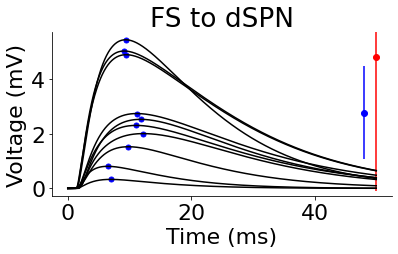

<Figure size 432x288 with 0 Axes>

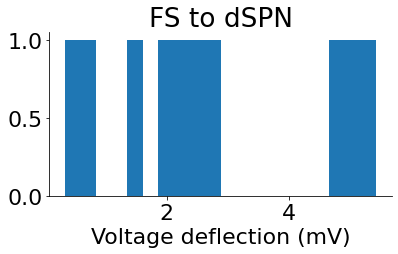

<Figure size 432x288 with 0 Axes>

In [3]:
pps.analyse(post_type="dSPN")

Loading 16 neurons with 220 synapses and 3 gap junctions
Loading networks/pair_pulse_simulation/simulation/output.hdf5
Number of pairs excluded, distance > 100.0 mum : 0
Min amp: 0.002478659301700284
Max amp: 0.009516963402110654
Mean amp: 0.005402954062278577 +/- 0.002528702873157005
Amps: [0.00304963 0.00428855 0.00247866 0.00786762 0.00521631 0.00951696]


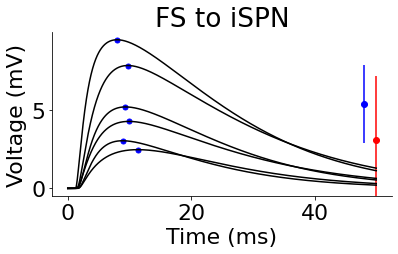

<Figure size 432x288 with 0 Axes>

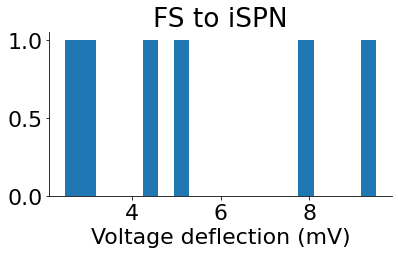

<Figure size 432x288 with 0 Axes>

In [ ]:
pps.analyse(post_type="iSPN")